In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("data/dataset_mood_smartphone.csv")

In [3]:
df["variable"].unique()

array(['mood', 'circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather'],
      dtype=object)

In [4]:
df["variable"].value_counts()

variable
screen                  96578
appCat.builtin          91288
appCat.communication    74276
appCat.entertainment    27125
activity                22965
appCat.social           19145
appCat.other             7650
circumplex.valence       5643
circumplex.arousal       5643
appCat.office            5642
mood                     5641
call                     5239
appCat.travel            2846
appCat.utilities         2487
sms                      1798
appCat.finance            939
appCat.unknown            939
appCat.game               813
appCat.weather            255
Name: count, dtype: int64

In [5]:
df.isnull().sum()

Unnamed: 0      0
id              0
time            0
variable        0
value         202
dtype: int64

<Axes: xlabel='variable', ylabel='count'>

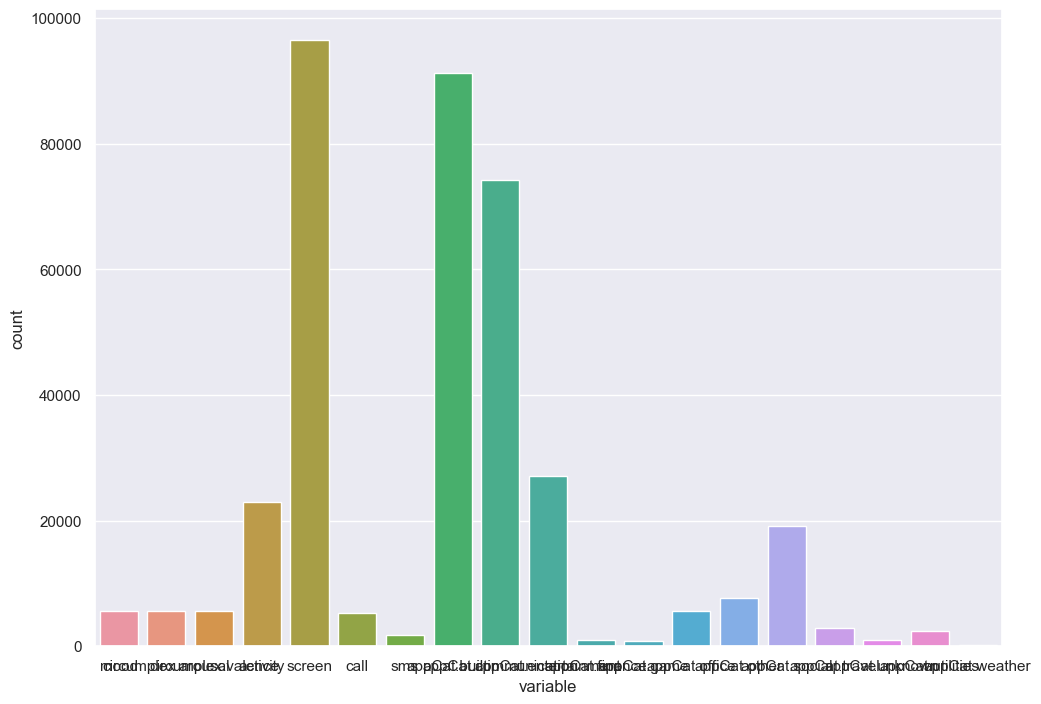

In [6]:
# plot the value counts of df["variable"]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x="variable", data=df)

<Axes: xlabel='variable', ylabel='count'>

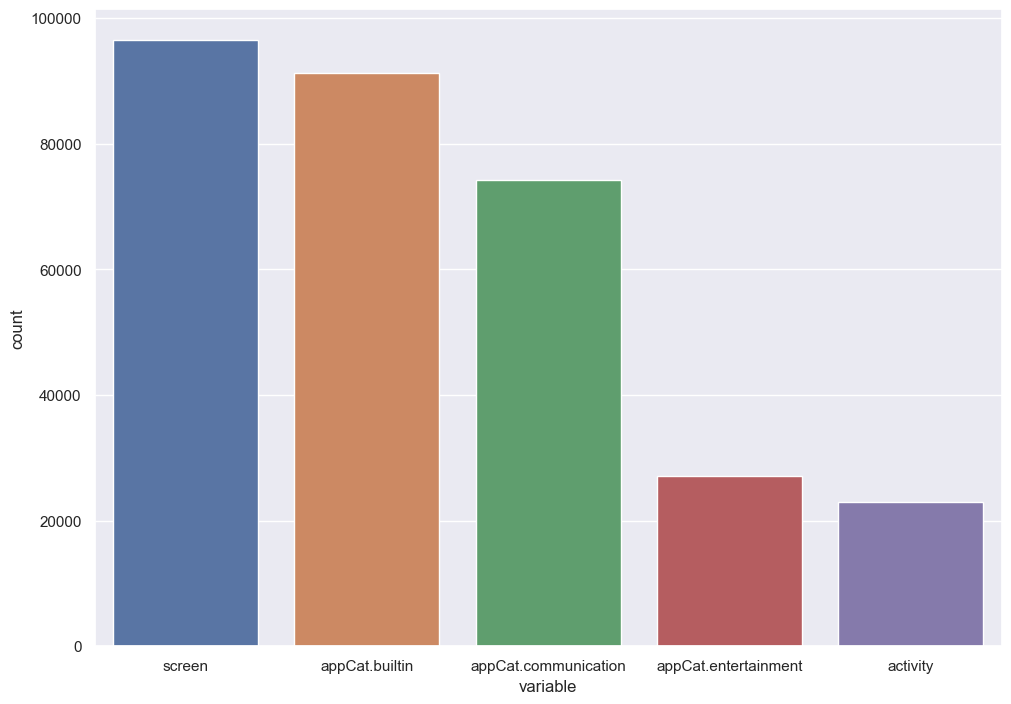

In [7]:
# plot top 5 most frequent values of df["variable"]
sns.countplot(x="variable", data=df, order=df["variable"].value_counts().iloc[:5].index)


<Axes: xlabel='variable', ylabel='value'>

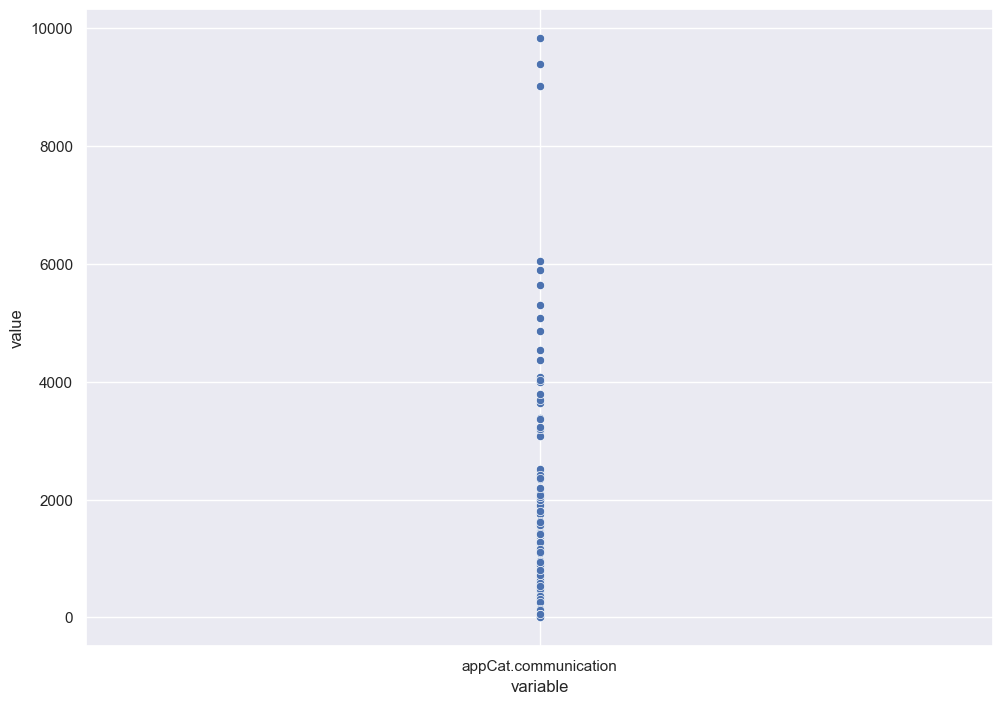

In [8]:
# plot value of appCat.communication of df["variable"] against the df["value"]
sns.scatterplot(x="variable", y="value", data=df[df["variable"] == "appCat.communication"])

In [9]:
df[df["variable"] == "appCat.communication"]

,Unnamed: 0,id,time,variable,value
234795,233408,AS14.01,2014-03-20 22:25:58.417,appCat.communication,4.190
234796,233409,AS14.01,2014-03-20 22:34:48.921,appCat.communication,2.009
234797,233413,AS14.01,2014-03-20 22:49:07.341,appCat.communication,30.286
234798,233417,AS14.01,2014-03-20 22:50:44.292,appCat.communication,16.054
234799,233420,AS14.01,2014-03-20 22:53:03.756,appCat.communication,13.053
...,...,...,...,...,...
309066,466749,AS14.33,2014-05-30 21:17:44.443,appCat.communication,4.011
309067,466759,AS14.33,2014-05-30 21:22:14.667,appCat.communication,117.770
309068,466768,AS14.33,2014-05-30 21:34:53.677,appCat.communication,48.216
309069,466799,AS14.33,2014-05-30 22:04:28.453,appCat.communication,3.025


/var/folders/0d/txwgnv556671r6k5crrzl9v40000gn/T/ipykernel_73183/1776715592.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["variable"] == "circumplex.arousal"]["value"])


<Axes: xlabel='value', ylabel='Density'>

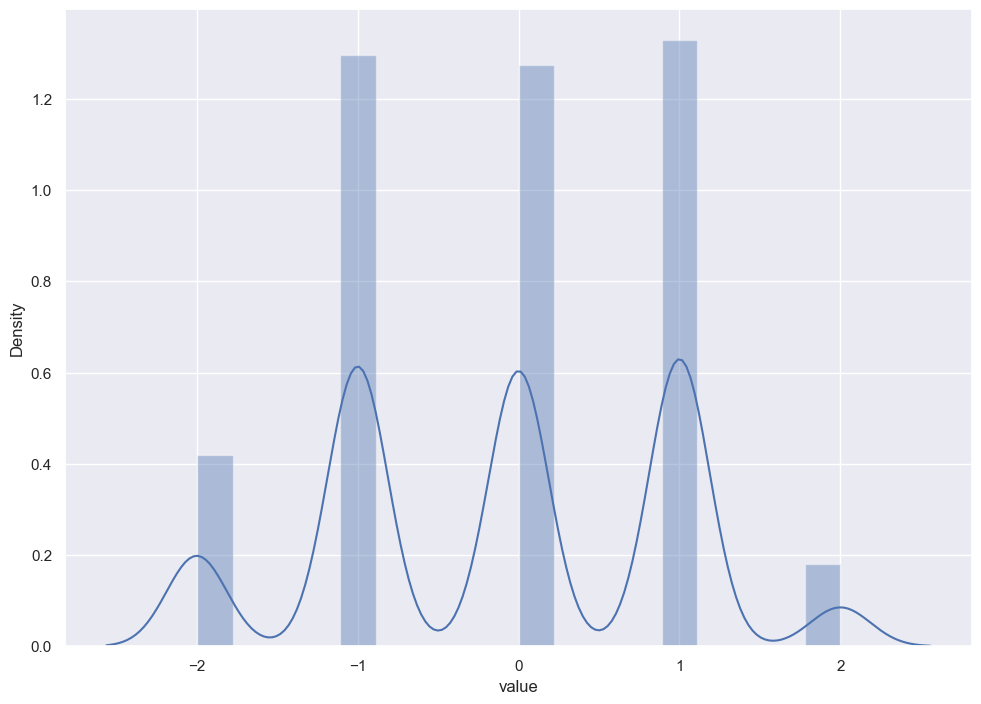

In [10]:
# plot the circumplex.arousal distribution from df["variable"] 
sns.distplot(df[df["variable"] == "circumplex.arousal"]["value"])

/var/folders/0d/txwgnv556671r6k5crrzl9v40000gn/T/ipykernel_73183/4013978304.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["variable"] == "appCat.entertainment"]["value"])


<Axes: xlabel='value', ylabel='Density'>

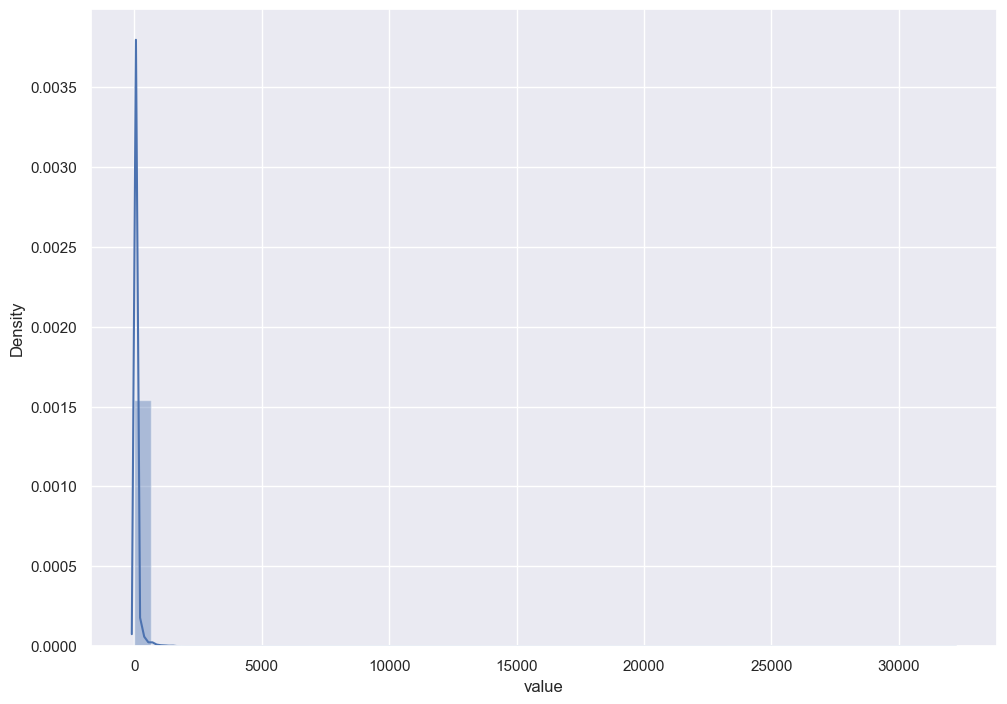

In [11]:
sns.distplot(df[df["variable"] == "appCat.entertainment"]["value"])

In [22]:
import pandas as pd

# Select the rows with the "mood" variable and group by ID and 5-day interval
df['time'] = pd.to_datetime(df['time'])
mood_df = df[df['variable'] == 'mood'].groupby(['id', pd.Grouper(key='time', freq='5D')])['value'].mean().reset_index()

# Select all variables except for "mood" and repeat for each variable
variable_list = df["variable"].unique().tolist()
variable_df_list = []
for variable in variable_list:
    if variable != 'mood':
        variable_df = df[df['variable'] == variable].groupby(['id', pd.Grouper(key='time', freq='5D')])['value'].mean().reset_index()
        variable_df = variable_df.rename(columns={'value': variable})
        variable_df_list.append(variable_df)

# Merge all resulting dataframes by ID and 5-day interval
merged_df = mood_df
for variable_df in variable_df_list:
    merged_df = pd.merge(merged_df, variable_df, on=['id', 'time'], how='outer')

# rename value column to mood column
merged_df = merged_df.rename(columns={'value': 'mood'})
print(merged_df.columns)
# Fill any missing intervals with NaN or default value
merged_df = merged_df.fillna(0)

# Select only the columns for the variables and their mean values, along with "mood"
variable_list.remove('mood')

final_df = merged_df[['id', 'time', 'mood'] + variable_list]

final_df.head()
# Optionally, save the preprocessed dataframe to a new CSV file
final_df.to_csv('data/preprocessed_dataset.csv', index=False)


Index(['id', 'time', 'mood', 'circumplex.arousal', 'circumplex.valence',
       'activity', 'screen', 'call', 'sms', 'appCat.builtin',
       'appCat.communication', 'appCat.entertainment', 'appCat.finance',
       'appCat.game', 'appCat.office', 'appCat.other', 'appCat.social',
       'appCat.travel', 'appCat.unknown', 'appCat.utilities',
       'appCat.weather'],
      dtype='object')


In [23]:
df.head()

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00,mood,6.0


In [24]:
final_df.head()

,id,time,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
0,AS14.01,2014-02-26,6.285714,-0.142857,0.571429,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1,AS14.01,2014-03-18,6.300000,0.400000,0.333333,0.0,103.517694,0.0,0.0,11.571983,...,53.764296,0.0,0.0,0.0,20.543471,69.347747,0.0,0.0,23.788677,0.0
2,AS14.01,2014-03-23,6.625000,0.291667,0.541667,0.0,105.269426,0.0,0.0,8.270806,...,92.735897,0.0,0.0,0.0,15.807667,83.247309,0.0,0.0,25.764200,0.0
3,AS14.01,2014-03-28,7.041667,-0.125000,0.583333,0.0,94.888570,0.0,0.0,24.854092,...,74.817914,0.0,0.0,0.0,22.612947,45.721430,0.0,0.0,21.121405,0.0
4,AS14.01,2014-04-02,6.478261,-0.409091,0.409091,0.0,82.228815,0.0,0.0,30.943379,...,60.078608,0.0,0.0,0.0,19.194864,56.348783,0.0,0.0,14.607857,0.0
